In [1]:
!pip install WordCloud

In [3]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
#reading our dataset which contains shopping trend information 
shop = pd.read_csv('C:/Users/gupta/Downloads/shopping_trends_updated.csv')

In [7]:
shop.shape

(3900, 18)

In [9]:
shop.to_excel('C:/Users/gupta/Downloads/shopping_trends_updated.xlsx')

In [11]:
shop.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [13]:
shop.dtypes

Customer ID                 int64
Age                         int64
Gender                     object
Item Purchased             object
Category                   object
Purchase Amount (USD)       int64
Location                   object
Size                       object
Color                      object
Season                     object
Review Rating             float64
Subscription Status        object
Shipping Type              object
Discount Applied           object
Promo Code Used            object
Previous Purchases          int64
Payment Method             object
Frequency of Purchases     object
dtype: object

In [15]:
# It shows the name of the column
shop.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [17]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [19]:
shop.shape

(3900, 18)

In [21]:
shop.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [23]:
print(f"The unique values of the customer's 'Age' are: {shop['Age'].unique()}")
print()
print(f"The unique values of the 'Gender' column are: {shop['Gender'].unique()}") #This prints unique values in Gender column
print()# This prints a blank line.
print(f"The unique values of the 'Category' column are: {shop['Category'].unique()}") #This prints unique values in Category column
print()
print(f"The unique values of the 'Purchase Amount (USD)' column are: {shop['Purchase Amount (USD)'].unique()}")
print()
print(f"The unique values of the 'Frequency of purchases' column are: {shop['Frequency of Purchases'].unique()}")
print()

The unique values of the customer's 'Age' are: [55 19 50 21 45 46 63 27 26 57 53 30 61 65 64 25 52 66 31 56 18 38 54 33
 36 35 29 70 69 67 20 39 42 68 49 59 47 40 41 48 22 24 44 37 58 32 62 51
 28 43 34 23 60]

The unique values of the 'Gender' column are: ['Male' 'Female']

The unique values of the 'Category' column are: ['Clothing' 'Footwear' 'Outerwear' 'Accessories']

The unique values of the 'Purchase Amount (USD)' column are: [ 53  64  73  90  49  20  85  34  97  31  68  72  51  81  36  38  48  62
  37  88  22  25  56  94  79  67  91  33  69  45  60  76  39 100  21  43
  54  55  30  28  59  24  83  46  70  29  26  58  96  40  32  95  41  47
  99  87  92  98  89  35  75  65  86  84  77  27  23  74  80  42  61  82
  78  93  50  57  66  44  52  71  63]

The unique values of the 'Frequency of purchases' column are: ['Fortnightly' 'Weekly' 'Annually' 'Quarterly' 'Bi-Weekly' 'Monthly'
 'Every 3 Months']



In [55]:
# Question 1
#The overall distribution of customer ages in the dataset
shop['Age'].value_counts()

Age
69    88
57    87
41    86
25    85
49    84
50    83
54    83
27    83
62    83
32    82
19    81
58    81
42    80
43    79
28    79
31    79
37    77
46    76
29    76
68    75
59    75
63    75
56    74
36    74
55    73
52    73
64    73
35    72
51    72
65    72
40    72
45    72
47    71
66    71
30    71
23    71
38    70
53    70
18    69
21    69
26    69
34    68
48    68
24    68
39    68
70    67
22    66
61    65
60    65
33    63
20    62
67    54
44    51
Name: count, dtype: int64

In [57]:
shop['Age'].value_counts().sort_index() #This prints the above result with ages in ascending order

Age
18    69
19    81
20    62
21    69
22    66
23    71
24    68
25    85
26    69
27    83
28    79
29    76
30    71
31    79
32    82
33    63
34    68
35    72
36    74
37    77
38    70
39    68
40    72
41    86
42    80
43    79
44    51
45    72
46    76
47    71
48    68
49    84
50    83
51    72
52    73
53    70
54    83
55    73
56    74
57    87
58    81
59    75
60    65
61    65
62    83
63    75
64    73
65    72
66    71
67    54
68    75
69    88
70    67
Name: count, dtype: int64

In [63]:
#Mean of ages of customers in the dataset:
shop['Age'].mean()

44.06846153846154

In [65]:
#Unique values of Gender
shop['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [67]:
# This will assign a new column, Age_category, to the shop DataFrame by categorizing the values in the Age column into bins. 
shop['Age_category']= pd.cut(shop['Age'], bins= [0,15,18,30,50,70], labels= ['Child' , 'Teen' , 'Young Adults' , 'Middle-Aged Adults', 'Old'])

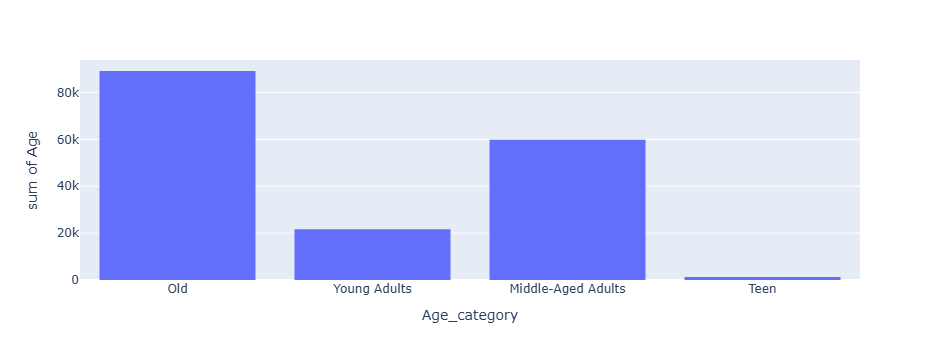

In [69]:
fig = px.histogram(shop, y = 'Age', x = 'Age_category' ) #It creates a histogram plot using Plotly Express (px) with the given details.
fig.show() # It prints the histogram created.

In [71]:
shop.columns # It prints the columns in the 'shop' dataframe

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [73]:
shop['Category'].unique() #It prints unique values in category column of 'shop' dataframe

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [75]:
# Question 2
# The average purchase amount vary across different product categories:
shop.groupby('Category')['Purchase Amount (USD)'].mean()

Category
Accessories    59.838710
Clothing       60.025331
Footwear       60.255426
Outerwear      57.172840
Name: Purchase Amount (USD), dtype: float64

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

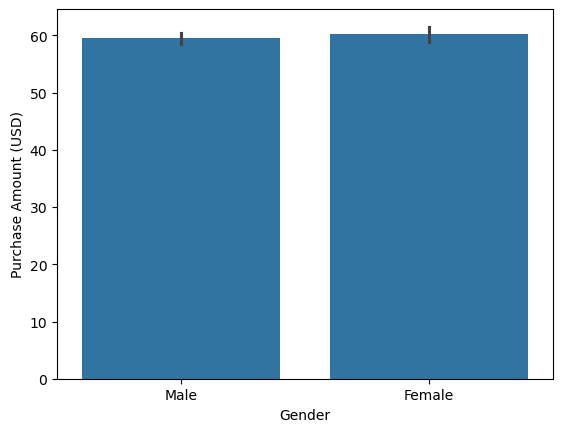

In [77]:
# Question 3
# Gender which has the highest number of purchases
sns.barplot(shop , x = 'Gender' , y = 'Purchase Amount (USD)') # It creates a bar plot using the Seaborn library

In [81]:
# Questiion 4
# The most commonly purchased items in each category
shop.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

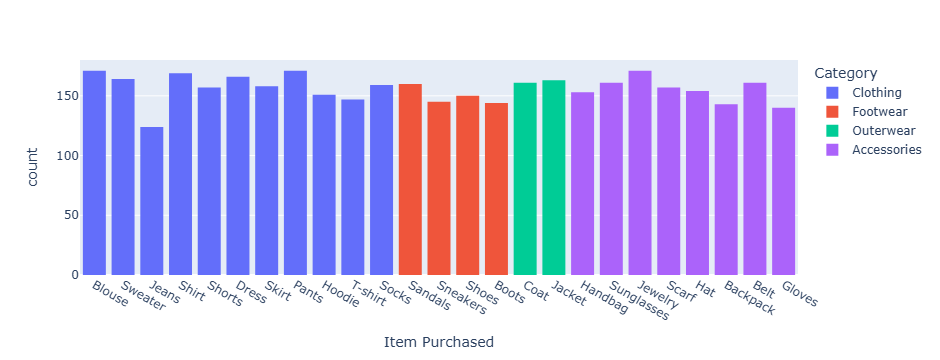

In [83]:
fig = px.histogram(shop , x = 'Item Purchased' , color = 'Category') # Creating histogram for above result
fig.show() # Print the created histogram

In [89]:
# Unique values of season coloum
shop['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [91]:
#Returns the total number of rows in the DataFrame shop where the Season column is equal to "Summer"
shop[shop['Season'] == 'Summer'].value_counts().sum()

955

In [93]:
#Returns the total number of rows in the DataFrame shop where the Season column is equal to "Winter"
shop[shop['Season'] == 'Winter'].value_counts().sum()

971

In [95]:
#Returns the total number of rows in the DataFrame shop where the Season column is equal to "Spring"
shop[shop['Season'] == 'Spring'].value_counts().sum()

999

In [97]:
#Returns the total number of rows in the DataFrame shop where the Season column is equal to "Fall"
shop[shop['Season'] == 'Fall'].value_counts().sum()

975

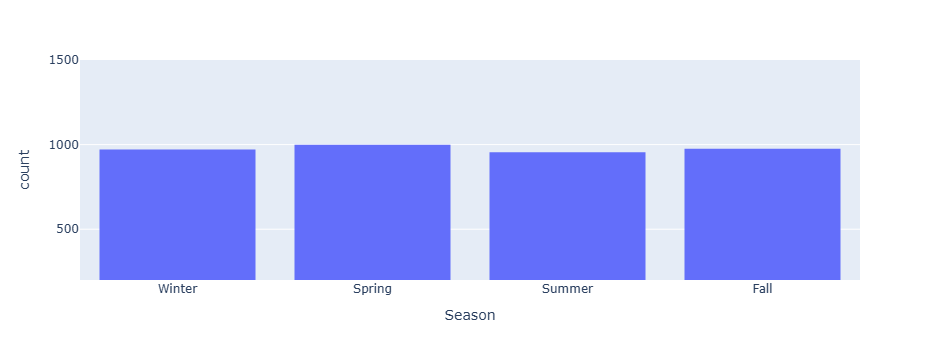

In [99]:
#Question 5) specific seasons or months where customer spending is significantly higher
fig = px.histogram(shop , x = 'Season' , range_y= [200 , 1500] ) #creates a histogram using Plotly Express (px) with the following configuration:
fig.show()

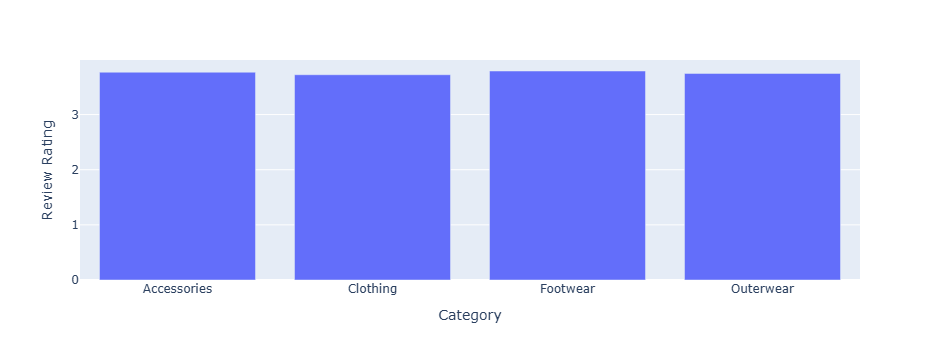

In [101]:
# Question 6) The average rating given by customers for each product category
shop_groupby = shop.groupby('Category')['Review Rating'].mean().reset_index()
fig = px.bar(shop_groupby ,x= 'Category' , y = 'Review Rating' )
fig.show()

In [105]:
# unique values in subscription status colom
shop['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

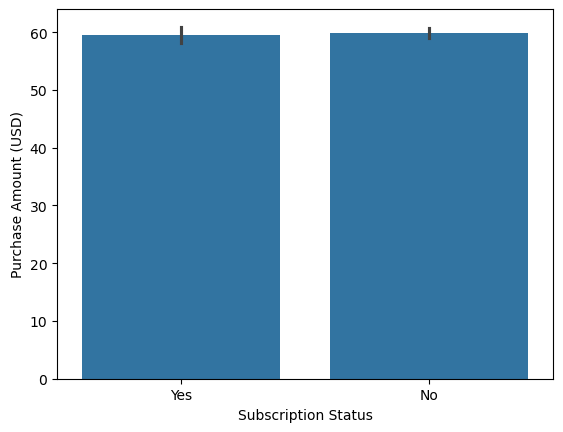

In [107]:
#create a bar plot using Seaborn
sns.barplot(shop  , x = 'Subscription Status' , y = 'Purchase Amount (USD)')

In [109]:
# calculates the total sum of all values in the Purchase Amount (USD) column of the shop DataFrame.
shop['Purchase Amount (USD)'].sum()

233081

In [119]:

# Question 7) Depiccts if there any notable differences in purchase behavior between subscribed and non-subscribed customers
shop.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

Subscription Status
No     59.865121
Yes    59.491928
Name: Purchase Amount (USD), dtype: float64

In [121]:
# calculates the average purchase amount (Purchase Amount (USD)) for each unique Payment Method, sorts the results in descending order, and returns the sorted series
shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().sort_values(ascending= False)

Payment Method
Debit Card       60.915094
Credit Card      60.074516
Bank Transfer    59.712418
Cash             59.704478
PayPal           59.245199
Venmo            58.949527
Name: Purchase Amount (USD), dtype: float64

In [123]:
#The command groups the shop DataFrame by Payment Method, calculates the average purchase amount for each payment method, and then resets the index to return a new DataFrame with the Payment Method and corresponding average purchase amount.
shop_groupby = shop.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()

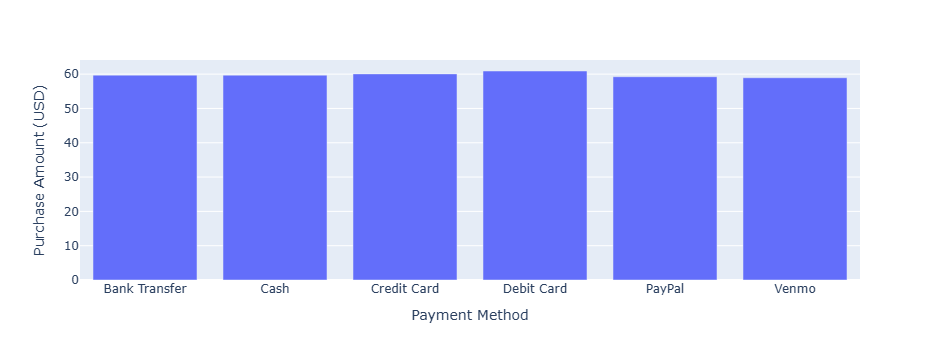

In [125]:
# Question 8) payment method which is the most popular among customers
fig = px.bar(shop_groupby , x = 'Payment Method' , y = 'Purchase Amount (USD)')
fig.show()

<Axes: xlabel='Payment Method', ylabel='Purchase Amount (USD)'>

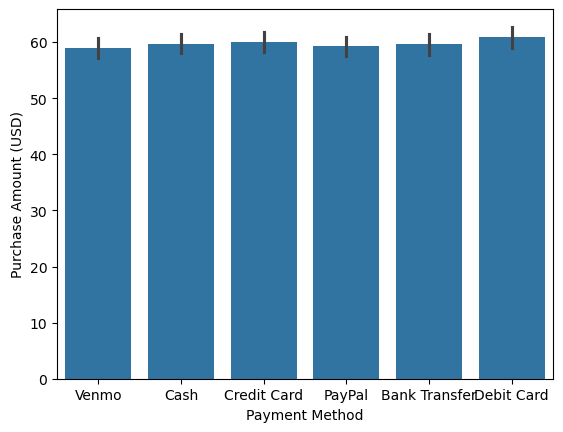

In [127]:
#Creating bar plot using seaborn method
sns.barplot(shop ,x='Payment Method' , y = 'Purchase Amount (USD)')

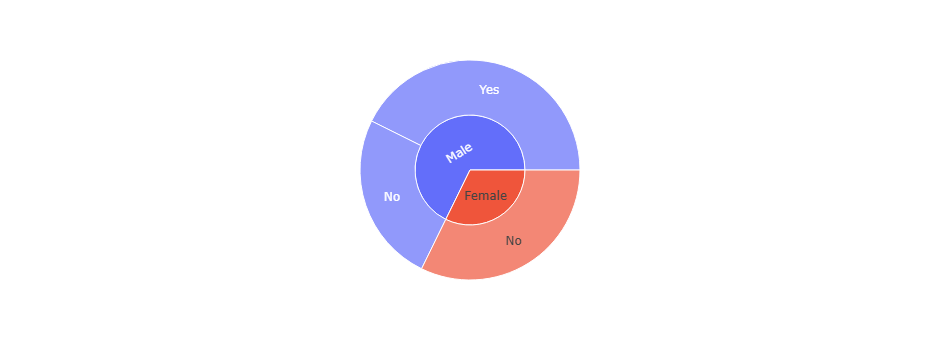

In [129]:
# Question 9) Do customers who use promo codes tend to spend more than those who don't?
shop_groupby  = shop.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()
fig = px.sunburst(shop , path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

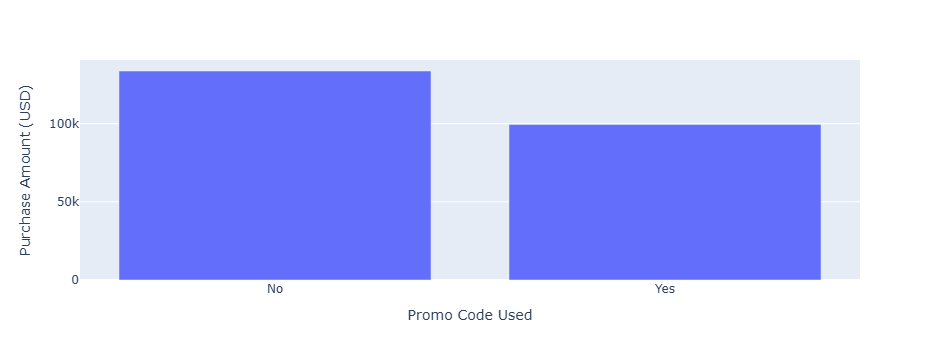

In [131]:
fig  =  px.bar(shop_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()

In [133]:
shop[['Age' , 'Age_category']] # Print values of mentioned colomns

,Age,Age_category
0,55,Old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,Old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


In [135]:
shop['Age_category'].unique() #print unique values of age_category

['Old', 'Young Adults', 'Middle-Aged Adults', 'Teen']
Categories (5, object): ['Child' < 'Teen' < 'Young Adults' < 'Middle-Aged Adults' < 'Old']

In [137]:
shop_group = shop.groupby('Frequency of Purchases')['Age'].sum()
#calculates the sum of ages for each unique value in the 'Frequency of Purchases' column of the DataFrame 'shop'

C:\Users\gupta\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



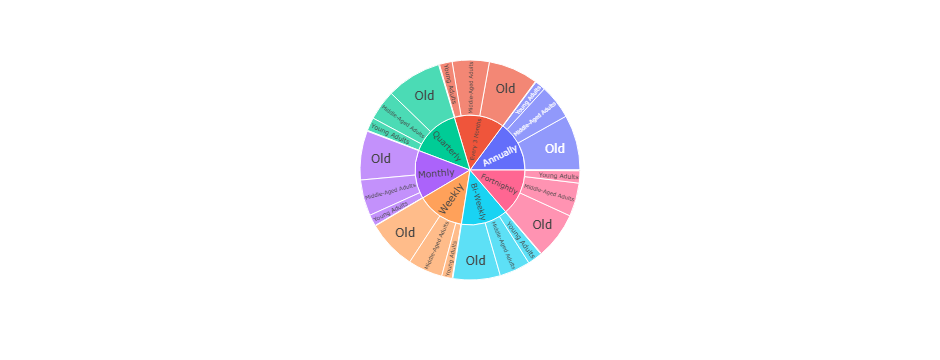

In [139]:
# Question 10)How does the frequency of purchases vary across different age groups?
px.sunburst(shop , path=['Frequency of Purchases','Age_category'] , values='Age') # creates a sunburst chart using the Plotly Express library (px).

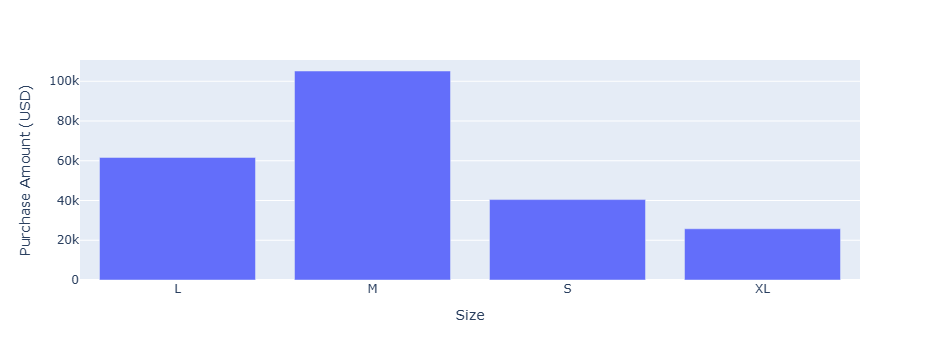

In [141]:
#Question) 11 Are there any correlations between the size of the product and the purchase amount?
shop_group = shop.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()
fig  = px.bar(shop_group , x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

In [145]:
# Question 12) Which shipping type is preferred by customers for different product categories?
shop.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [147]:
shop['Shipping_Category'] =shop['Shipping Type'].map({'Express': 0, 'Free Shipping': 1, 'Next Day Air': 2,
                                                       'Standard': 3, '2-Day Shipping': 4, 'Store Pickup': 5})

In [149]:
shop['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [153]:
shop['Category_num'] =shop['Category'].map({'Clothing':1, 'Footwear':2, 'Outerwear':3, 'Accessories':4})

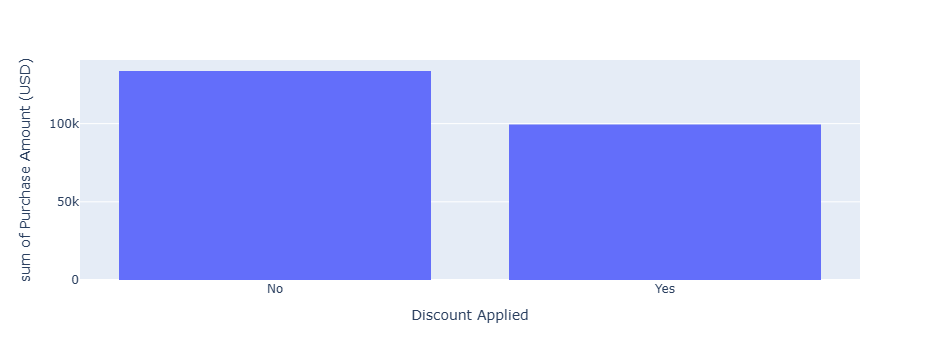

In [157]:
# Question 13 How does the presence of a discount affect the purchase decision of customers?
shop_group = shop.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()
px.histogram(shop_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

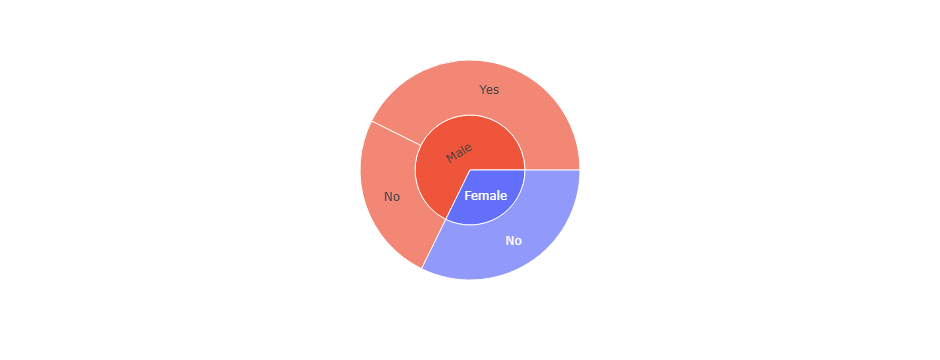

In [159]:
fig = px.sunburst(shop , path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')

fig.show()

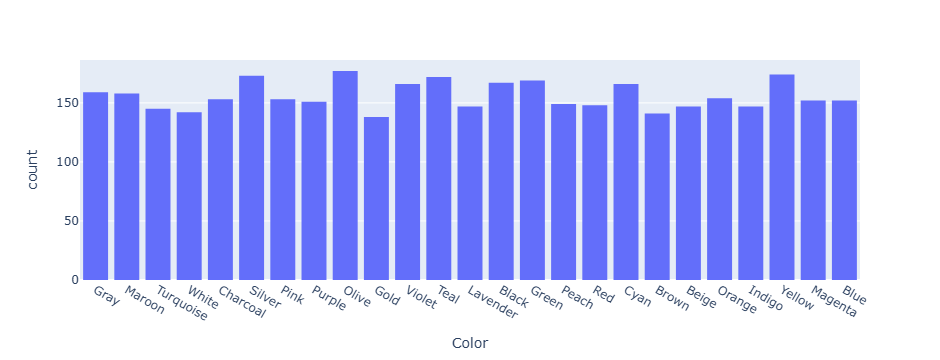

In [161]:
# Question 14) Are there any specific colors that are more popular among customers?
px.histogram(shop , x = 'Color')

In [163]:
shop['Color'].value_counts().nlargest(5)

Color
Olive     177
Yellow    174
Silver    173
Teal      172
Green     169
Name: count, dtype: int64

In [165]:
# Question 15)  What is the average number of previous purchases made by customers?
shop['Previous Purchases'].mean()

25.35153846153846

In [167]:
# Question 16 Are there any noticeable differences in purchase behavior between different locations?
shop.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

Location
Alaska            67.597222
Pennsylvania      66.567568
Arizona           66.553846
West Virginia     63.876543
Nevada            63.379310
Washington        63.328767
North Dakota      62.891566
Virginia          62.883117
Utah              62.577465
Michigan          62.095890
Tennessee         61.974026
New Mexico        61.901235
Rhode Island      61.444444
Texas             61.194805
Arkansas          61.113924
Illinois          61.054348
Mississippi       61.037500
Massachusetts     60.888889
Iowa              60.884058
North Carolina    60.794872
Wyoming           60.690141
South Dakota      60.514286
New York          60.425287
Ohio              60.376623
Montana           60.250000
Idaho             60.075269
Nebraska          59.448276
New Hampshire     59.422535
Alabama           59.112360
California        59.000000
Indiana           58.924051
Georgia           58.797468
South Carolina    58.407895
Oklahoma          58.346667
Missouri          57.913580
Hawaii     

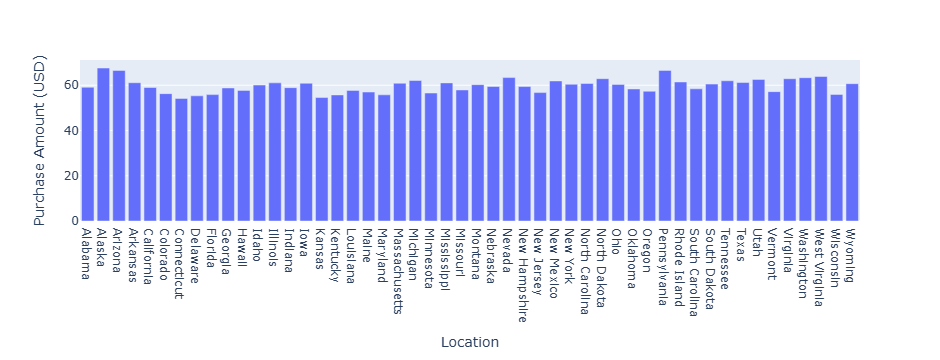

In [171]:
shop_group = shop.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()
fig = px.bar(shop_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

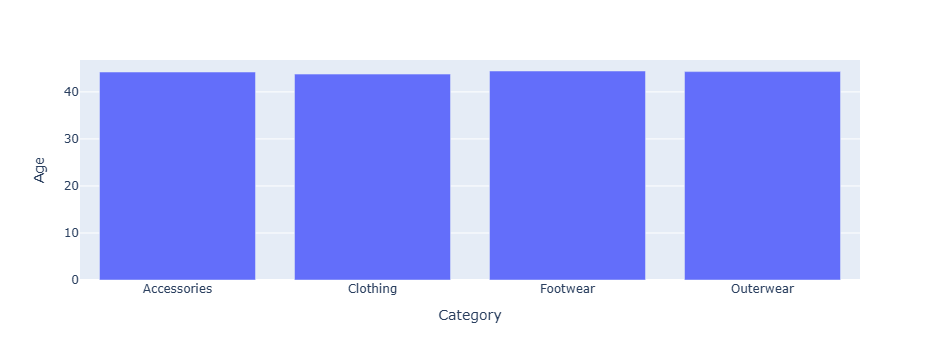

In [173]:
# Question 17 Is there a relationship between customer age and the category of products they purchase?
shop_group = shop.groupby('Category')['Age'].mean().reset_index()
fig = px.bar(shop_group ,y = 'Age' , x= 'Category')
fig.show()

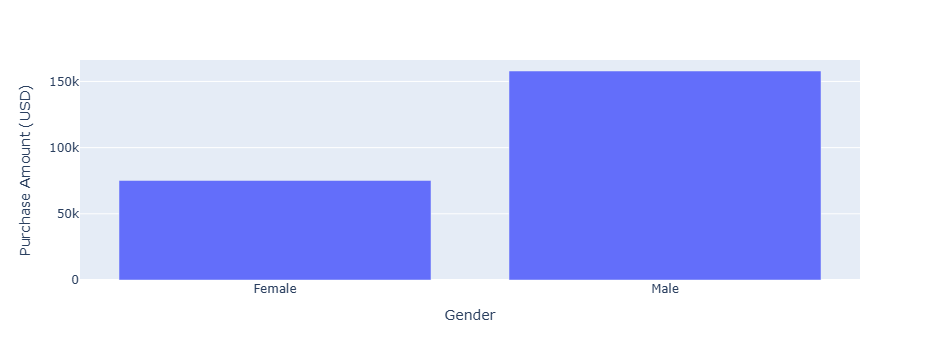

In [175]:
# Question 18 How does the average purchase amount differ between male and female customers?
shop_group = shop.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
fig = px.bar(shop_group , x = 'Gender' , y = 'Purchase Amount (USD)')
fig.show()

C:\Users\gupta\anaconda3\Lib\site-packages\plotly\express\_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



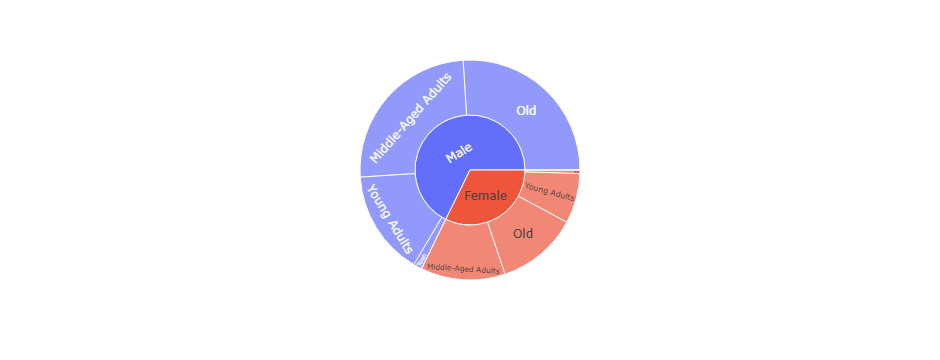

In [177]:
# Question 19)	How does the average purchase amount differ among customers from different age category?
px.sunburst(data_frame= shop , path = ['Gender' ,'Age_category'] , values='Purchase Amount (USD)')